In [16]:
import pandas as pd
import xlrd
from mlxtend.preprocessing import TransactionEncoder
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_excel ('set.xlsx', sheet_name='Sheet8', engine='openpyxl')

In [3]:
data.head()

,InvoiceNo,Product,Quantity,Occupation
0,1,Mlijeko,1,Employed
1,1,Voda,1,Employed
2,1,Sokovi,1,Employed
3,1,Kafa,1,Employed
4,1,Čokolade,1,Employed


In [4]:
data.columns

Index(['InvoiceNo', 'Product', 'Quantity', 'Occupation'], dtype='object')

In [5]:
data.Product.unique()

array(['Mlijeko', 'Voda', 'Sokovi', 'Kafa', 'Čokolade', 'Bombone', 'Keks',
       'Vegeta', 'So', 'Supa', 'Brašno', 'Ulje', 'Tjestenina', 'Začini',
       'Sir', 'Jogurt', 'Piletina', 'Teletina', 'Gljive', 'Jabuke',
       'Kruške', 'Banane', 'Limun', 'Narandža', 'Čips', 'Kolači',
       'Deterdžent', 'Omekšivač', 'Šampon', 'Regenerator', 'Sapun',
       'Sredstvazačišćenje', 'Krompir', 'Luk', 'Kupus', 'Paradajz',
       'Krastavac', 'Kiselasalata', 'Salata', 'Šećer', 'Nescafe',
       'Alkoholnapića', 'Pastazazube', 'Toaletpapir', 'Riža', 'Kukuruz',
       'Kreme', 'Smoki', 'Grisini', 'Kikiriki', 'Kokice', 'Žvake',
       'Mineralnavoda', 'Ostalagaziranapića', 'Puding', 'Šlag',
       'Vrhnjezakuhanje', 'Kockazakafu', 'Puder', 'Maskara', 'Labelo',
       'Četkazakosu', 'Parfem', 'Lakzanokte', 'Lakzakosu', 'Aceton',
       'Energetskapića', 'Lijekovi', 'Biljnipreparati', 'Čajevi', 'Jaja',
       'Hljeb', 'Sjajzausne', 'Karmin', 'Korektor'], dtype=object)

In [6]:
data.Occupation.unique()

array(['Employed', 'Unemployed'], dtype=object)

In [7]:
data['Product'] = data['Product'].str.strip()

In [8]:
data.dropna(axis = 0, subset =['InvoiceNo'], inplace = True)
data['InvoiceNo'] = data['InvoiceNo'].astype('str')

In [9]:
# Buyings for employed
basket_Employed = (data[data['Occupation'] =="Employed"]
          .groupby(['InvoiceNo', 'Product'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [10]:
# Buyings for unemployed
basket_Unemployed = (data[data['Occupation'] =="Unemployed"]
          .groupby(['InvoiceNo', 'Product'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [11]:
# Defining the hot encoding function to make the data suitable
# for the concerned libraries
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1
 
# Encoding the datasets
basket_encoded = basket_Employed.applymap(hot_encode)
basket_Employed = basket_encoded
 
basket_encoded = basket_Unemployed.applymap(hot_encode)
basket_Unemployed = basket_encoded

In [12]:
# Building the model for employed
frq_items = apriori(basket_Employed, min_support = 0.5, use_colnames = True)
 
# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

        antecedents consequents  antecedent support  consequent support  \
1          (Brašno)      (Ulje)            0.523810            0.535714   
0            (Ulje)    (Brašno)            0.535714            0.523810   
14     (Tjestenina)      (Kafa)            0.690476            0.785714   
24    (Hljeb, Kafa)   (Mlijeko)            0.595238            0.726190   
23  (Mlijeko, Kafa)     (Hljeb)            0.595238            0.738095   

     support  confidence      lift  leverage  conviction  
1   0.500000    0.954545  1.781818  0.219388   10.214286  
0   0.500000    0.933333  1.781818  0.219388    7.142857  
14  0.583333    0.844828  1.075235  0.040816    1.380952  
24  0.500000    0.840000  1.156721  0.067744    1.711310  
23  0.500000    0.840000  1.138065  0.060658    1.636905  


In [13]:
# Building the model for unemployed
frq_items = apriori(basket_Unemployed, min_support = 0.5, use_colnames = True)
 
# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

                               antecedents                   consequents  \
22008                       (Ulje, Čajevi)                (Šećer, Hljeb)   
22013                       (Šećer, Hljeb)                (Ulje, Čajevi)   
34268         (Brašno, Pastazazube, Hljeb)      (Tjestenina, Deterdžent)   
34281             (Tjestenina, Deterdžent)  (Brašno, Pastazazube, Hljeb)   
35109  (Brašno, Hljeb, Sredstvazačišćenje)      (Tjestenina, Deterdžent)   

       antecedent support  consequent support  support  confidence  lift  \
22008                 0.5                 0.5      0.5         1.0   2.0   
22013                 0.5                 0.5      0.5         1.0   2.0   
34268                 0.5                 0.5      0.5         1.0   2.0   
34281                 0.5                 0.5      0.5         1.0   2.0   
35109                 0.5                 0.5      0.5         1.0   2.0   

       leverage  conviction  
22008      0.25         inf  
22013      0.25         in

Top 5 frequently sold products(Tabular Representation)


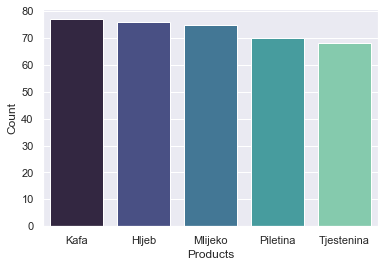

In [26]:
print("Top 5 frequently sold products(Tabular Representation)")
x = data['Product'].value_counts().sort_values(ascending=False)[:5]
fig = px.bar(x= x.index, y= x.values)
sns.barplot(x=x.index, y=x.values, palette="mako")
plt.xlabel("Products")
plt.ylabel("Count")
plt.show()
fig.update_layout(title_text= "Top 5 frequently sold products (Graphical Representation)", xaxis_title= "Products", yaxis_title="Count")
fig.show()


SyntaxError: invalid syntax (<ipython-input-20-bbcc069cc6ad>, line 5)